In [1]:
import pickle
import pandas as pd
pd.set_option('display.max_rows', 150)

In [2]:
#d = pd.read_pickle('data/evaluation/sap_sam_2022/filtered/google_flan-t5-small_checkpoint-128400_evaluation.pkl')


# validation set

**each constraint seperated**

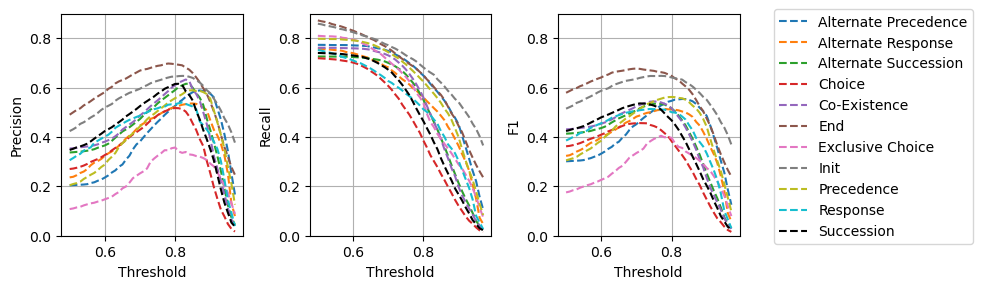

In [10]:
# on exact rules
import matplotlib.pyplot as plt 
import pandas as pd
colors = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','black']
d = pd.read_pickle('evaluation_sap_sam_2022_validation_label2constraint_seperated_new.pkl')
d = d[['constraint_type', 'threshold', 'precision', 'recall','f1']].groupby(['threshold','constraint_type']).mean().reset_index()
f, ax = plt.subplots(ncols=3,figsize=(10, 3))
for index, constraint in enumerate(sorted(d.constraint_type.unique())):
    d_temp=d[d['constraint_type']==constraint]
    ax[0].plot(d_temp.threshold, d_temp.precision, color=colors[index], label=constraint, linestyle='--')
ax[0].grid()
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Precision')
ax[0].set_ylim(0,0.9)
for index, constraint in enumerate(sorted(d.constraint_type.unique())):
    d_temp=d[d['constraint_type']==constraint]
    ax[1].plot(d_temp.threshold, d_temp.recall, color=colors[index], label=constraint, linestyle='--')
ax[1].grid()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('Recall')
ax[1].set_ylim(0,0.9)
for index, constraint in enumerate(sorted(d.constraint_type.unique())):
    d_temp=d[d['constraint_type']==constraint]
    ax[2].plot(d_temp.threshold, d_temp.f1, color=colors[index], label=constraint, linestyle='--')
ax[2].grid()
ax[2].set_xlabel('Threshold')
ax[2].set_ylabel('F1')
ax[2].set_ylim(0,0.9)
ax[2].legend(bbox_to_anchor=(1.15, 1.05))
f.tight_layout()
plt.show()

get the best threshold for each constraint 

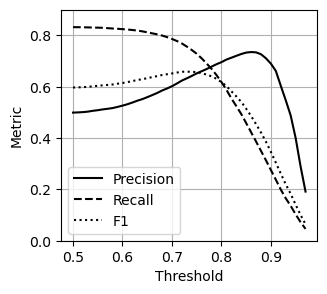

In [12]:
#FOR COMPARISON WITH BERT AND SVM (on follow relations) on VALIDATION SET 
import matplotlib.pyplot as plt 
import pandas as pd
d = pd.read_pickle('evaluation_sap_sam_2022_validation_label2constraint_for_comparison_set_new.pkl')
d.threshold = d.threshold.apply(lambda x: round(x,2))
d = d[['threshold', 'precision', 'recall','f1','case_name']].groupby(['threshold']).mean().reset_index()
f, ax = plt.subplots(1, 1,figsize=(3.3, 3))
ax.plot(d.threshold, d.precision, color='black', label="Precision", linestyle="-")
ax.plot(d.threshold, d.recall, color='black', label="Recall", linestyle="--")
ax.plot(d.threshold, d.f1, color='black', label="F1", linestyle='dotted')
ax.grid()
ax.set_xlabel('Threshold')
ax.set_ylim(0,0.9)
ax.set_ylabel('Metric')
ax.legend(loc='lower left')
plt.show()
#f.savefig('evaluation_sap_sam_2022_validation_label2constraint_for_comparison_set_new.pdf',bbox_inches='tight')

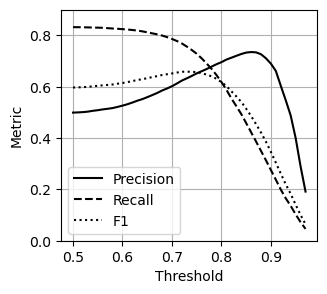

In [21]:
#FOR COMPARISON WITH BERT AND SVM (on follow relations) on VALIDATION SET 
import matplotlib.pyplot as plt 
import pandas as pd
d = pd.read_pickle('evaluation_sap_sam_2022_validation_label2constraint_for_comparison_set_new.pkl')
d.threshold = d.threshold.apply(lambda x: round(x,2))
d = d[['threshold', 'precision', 'recall','f1','case_name']].groupby(['threshold']).mean().reset_index()
f, ax = plt.subplots(1, 1,figsize=(3.3, 3))
ax.plot(d.threshold, d.precision, color='black', label="Precision", linestyle="-")
ax.plot(d.threshold, d.recall, color='black', label="Recall", linestyle="--")
ax.plot(d.threshold, d.f1, color='black', label="F1", linestyle='dotted')
ax.grid()
ax.set_xlabel('Threshold')
ax.set_ylim(0,0.9)
ax.set_ylabel('Metric')
ax.legend(loc='lower left')
plt.show()
#f.savefig('evaluation_sap_sam_2022_validation_label2constraint_for_comparison_set_new.pdf',bbox_inches='tight')

In [14]:
d['f1'].idxmax()

23

In [23]:
opt_th = d.iloc[23]['threshold']
opt_th

0.73

# test set

### unseen labels

with individual thresholds:

In [30]:
import pandas as pd
d = pd.read_pickle('evaluation_sap_sam_2022_test_label2constraint_for_comparison_set_unseen_labels_individual_thresholds_new.pkl')
d.mean()

/tmp/ipykernel_1180182/3591944597.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d.mean()


precision    0.470120
recall       0.667395
f1           0.507187
dtype: float64

without individual threshold:

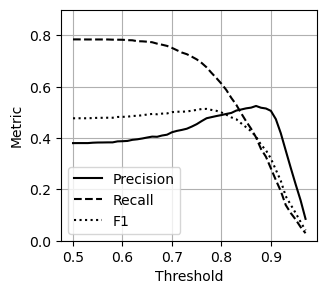

In [31]:
#FOR COMPARISON WITH BERT AND SVM (on follow relations) on TEST SET - ONLY UNSEEN LABELS
import matplotlib.pyplot as plt 
import pandas as pd
d = pd.read_pickle('evaluation_sap_sam_2022_test_label2constraint_for_comparison_set_unseen_labels_new.pkl')
d.threshold = d.threshold.apply(lambda x: round(x,2))
d = d[['threshold', 'precision', 'recall','f1','case_name']].groupby(['threshold']).mean().reset_index()
f, ax = plt.subplots(1, 1,figsize=(3.3, 3))
ax.plot(d.threshold, d.precision, color='black', label="Precision", linestyle="-")
ax.plot(d.threshold, d.recall, color='black', label="Recall", linestyle="--")
ax.plot(d.threshold, d.f1, color='black', label="F1", linestyle='dotted')
ax.grid()
ax.set_xlabel('Threshold')
ax.set_ylim(0,0.9)
ax.set_ylabel('Metric')
ax.legend(loc='lower left')
plt.show()
#f.savefig('evaluation_sap_sam_2022_test_label2constraint_for_comparison_unseen_labels_new.pdf',bbox_inches='tight')

In [32]:
d[d['threshold']==opt_th]

,threshold,precision,recall,f1
23,0.73,0.436345,0.726802,0.503633


### test set for comparison

without individual threshold

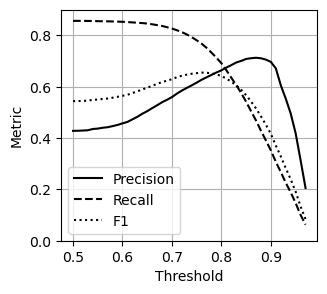

In [26]:
#FOR COMPARISON WITH BERT AND SVM (on follow relations) on TEST SET
import matplotlib.pyplot as plt 
import pandas as pd
d = pd.read_pickle('evaluation_sap_sam_2022_test_label2constraint_for_comparison_set_new.pkl')
d.threshold = d.threshold.apply(lambda x: round(x,2))
d = d[['threshold', 'precision', 'recall','f1','case_name']].groupby(['threshold']).mean().reset_index()
f, ax = plt.subplots(1, 1,figsize=(3.3, 3))
ax.plot(d.threshold, d.precision, color='black', label="Precision", linestyle="-")
ax.plot(d.threshold, d.recall, color='black', label="Recall", linestyle="--")
ax.plot(d.threshold, d.f1, color='black', label="F1", linestyle='dotted')
ax.grid()
ax.set_xlabel('Threshold')
ax.set_ylim(0,0.9)
ax.set_ylabel('Metric')
ax.legend(loc='lower left')
plt.show()
#f.savefig('evaluation_sap_sam_2022_test_label2constraint_for_comparison_set_new.pdf',bbox_inches='tight')

In [27]:
d[d['threshold']==opt_th]

,threshold,precision,recall,f1
23,0.73,0.595309,0.803706,0.647093


test set for comparison with individual thresholds

In [28]:
d = pd.read_pickle('evaluation_sap_sam_2022_test_label2constraint_for_comparison_set_individual_thresholds_new.pkl')
d.mean()

/tmp/ipykernel_1180182/3635260397.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d.mean()


precision    0.644061
recall       0.755677
f1           0.665833
dtype: float64

### test set overall performance

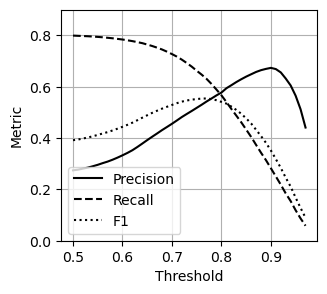

In [29]:
# OVERALL PERFORMANCE (on exact rules)
import matplotlib.pyplot as plt 
import pandas as pd
d = pd.read_pickle('evaluation_sap_sam_2022_test_label2constraint_for_comparison_overall_performance_new.pkl')
d.threshold = d.threshold.apply(lambda x: round(x,2))
d = d[['threshold', 'precision', 'recall','f1','case_name']].groupby(['threshold']).mean().reset_index()
f, ax = plt.subplots(1, 1,figsize=(3.3, 3))
ax.plot(d.threshold, d.precision, color='black', label="Precision", linestyle="-")
ax.plot(d.threshold, d.recall, color='black', label="Recall", linestyle="--")
ax.plot(d.threshold, d.f1, color='black', label="F1", linestyle='dotted')
ax.grid()
ax.set_ylim(0,0.9)
ax.set_xlabel('Threshold')
ax.set_ylabel('Metric')
ax.legend(loc='lower left')
plt.show()
#f.savefig('evaluation_sap_sam_2022_test_label2constraint_for_comparison_overall_performance_new.pdf',bbox_inches='tight')

### test set overall performance each rule

In [71]:
line_styles = ['solid', 'dotted', 'dashed','dashdot',(0,(3,1,1,1,1,1)),'solid', 'dotted', 'dashed','dashdot',(0,(3,1,1,1,1,1)),'solid', 'dotted', 'dashed','dashdot',(0,(3,1,1,1,1,1))]#'-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':',]
#markerstyle = []

In [72]:
markerstyle = ['.',
 #',',
 'o',
 'v',
 '^',
 '<',
 '>',
 #'1',
 #'2',
 #'3',
 #'4',
 #'8',
 's',
 'p',
 '*',
 #'h',
 #'H',
 #'+',
 'X',
 'D',
 'd',
 '|',
 '_',
 'P',
 'x',]

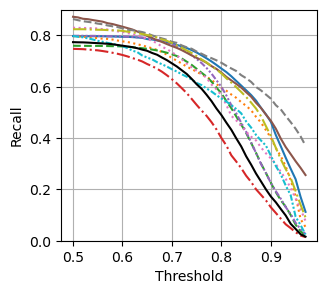

In [87]:
# OVERALL PERFORMANCE (on exact rules)
import matplotlib.pyplot as plt 
import pandas as pd
colors = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','black']

d = pd.read_pickle('evaluation_sap_sam_2022_test_label2constraint_seperated_new.pkl')
d = d[['constraint_type', 'threshold', 'precision', 'recall','f1']].groupby(['threshold','constraint_type']).mean().reset_index()
f, ax = plt.subplots(1,1,figsize=(3.3, 3))
#for index, constraint in enumerate(sorted(d.constraint_type.unique())):
#    d_temp=d[d['constraint_type']==constraint]
#    ax.plot(d_temp.threshold, d_temp.precision, color=colors[index], label=constraint, linestyle=line_styles[index])#,marker=markerstyle[index], markersize=4)
#ax.grid()
#ax.set_xlabel('Threshold')
#ax.set_ylabel('Precision')
#ax.set_ylim(0,0.9)
for index, constraint in enumerate(sorted(d.constraint_type.unique())):
    d_temp=d[d['constraint_type']==constraint]
    ax.plot(d_temp.threshold, d_temp.recall, color=colors[index], label=constraint, linestyle=line_styles[index])#,marker=markerstyle[index], markersize=4)
ax.grid()
ax.set_xlabel('Threshold')
ax.set_ylabel('Recall')
ax.set_ylim(0,0.9)
#for index, constraint in enumerate(sorted(d.constraint_type.unique())):
#    d_temp=d[d['constraint_type']==constraint]
#    ax.plot(d_temp.threshold, d_temp.f1, color=colors[index], label=constraint, linestyle=line_styles[index])#,marker=markerstyle[index], markersize=4)
#ax.grid()
#ax.set_xlabel('Threshold')
#ax.set_ylabel('F1')
#ax.set_ylim(0,0.9)
#ax.legend(bbox_to_anchor=(1.15, 1.05))
#f.tight_layout()
plt.show()
f.savefig('evaluation_sap_sam_2022_test_label2constraint_seperated_recall.pdf',bbox_inches='tight')

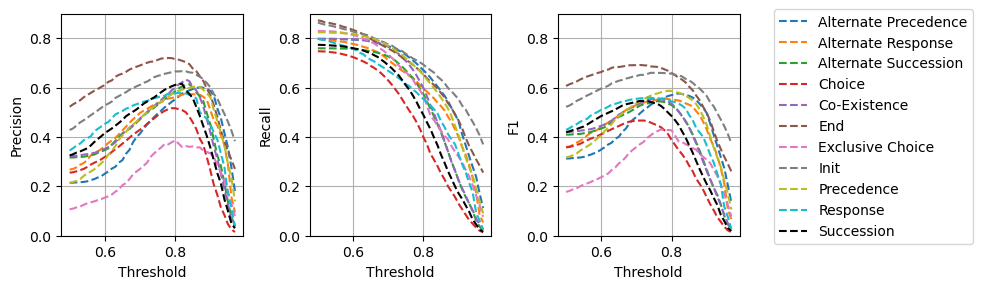

In [26]:
# OVERALL PERFORMANCE (on exact rules)
import matplotlib.pyplot as plt 
import pandas as pd
colors = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','black']
d = pd.read_pickle('evaluation_sap_sam_2022_test_label2constraint_seperated_new.pkl')
d = d[['constraint_type', 'threshold', 'precision', 'recall','f1']].groupby(['threshold','constraint_type']).mean().reset_index()
f, ax = plt.subplots(ncols=3,figsize=(10, 3))
for index, constraint in enumerate(sorted(d.constraint_type.unique())):
    d_temp=d[d['constraint_type']==constraint]
    ax[0].plot(d_temp.threshold, d_temp.precision, color=colors[index], label=constraint, linestyle='--')
ax[0].grid()
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Precision')
ax[0].set_ylim(0,0.9)
for index, constraint in enumerate(sorted(d.constraint_type.unique())):
    d_temp=d[d['constraint_type']==constraint]
    ax[1].plot(d_temp.threshold, d_temp.recall, color=colors[index], label=constraint, linestyle='--')
ax[1].grid()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('Recall')
ax[1].set_ylim(0,0.9)
for index, constraint in enumerate(sorted(d.constraint_type.unique())):
    d_temp=d[d['constraint_type']==constraint]
    ax[2].plot(d_temp.threshold, d_temp.f1, color=colors[index], label=constraint, linestyle='--')
ax[2].grid()
ax[2].set_xlabel('Threshold')
ax[2].set_ylabel('F1')
ax[2].set_ylim(0,0.9)
ax[2].legend(bbox_to_anchor=(1.15, 1.05))
f.tight_layout()
plt.show()
#f.savefig('evaluation_sap_sam_2022_test_label2constraint_seperated.pdf',bbox_inches='tight')